Digit Recognition using PyTorch:

In [10]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

MNIST Dataset is collection of 70000 handwritten digits split into training and test set of 60000 and 10000 images respectively.

In [11]:
train=datasets.MNIST('', train=True, download=True,  transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST('', train=True, download=False,  transform=transforms.Compose([transforms.ToTensor()]))
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

Now we will create our own Neural Network:

In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)  ##The shape of the image... flat row of pixel
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self,x):
        x =F.relu(self.fc1(x))
        x =F.relu(self.fc2(x))
        x =F.relu(self.fc3(x))
        x =self.fc4(x)
        return F.log_softmax(x,dim=1)
        
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [13]:
X=torch.rand((28,28))
X=X.view(-1,28*28)
output=net(X)
output

tensor([[-2.4770, -2.2710, -2.2189, -2.3473, -2.2564, -2.2488, -2.3559, -2.2512,
         -2.3468, -2.2787]], grad_fn=<LogSoftmaxBackward>)

In [14]:
optimizer=optim.Adam(net.parameters(),lr=0.0001)

Adam is a combination of both AdaGrad and RMSProp. It is used to achieve better results faster.

In [28]:
EPOCHS=3  ###FUll pass ovr data
for epoch in  range(EPOCHS):
    for data in trainset:
        #data is a batch of featureset and lables
        X, y = data
        #print(X[0]) #print(y[0])
        net.zero_grad()
        output=net(X.view(-1,28*28))
        loss=F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0803, grad_fn=<NllLossBackward>)
tensor(0.0436, grad_fn=<NllLossBackward>)
tensor(0.0134, grad_fn=<NllLossBackward>)


In [29]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.971


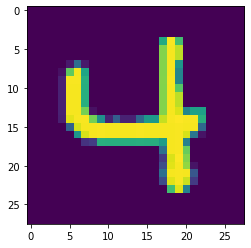

tensor(4)


In [30]:
plt.imshow(X[0].view(28,28))
plt.show()
print(torch.argmax(net(X[0].view(-1,784))[0]))
